<a href="https://colab.research.google.com/github/xydeep21/Sales-Forecasting-/blob/main/Sales%20Forecasting1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Problem Define:**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# **2.Gather Data**
The dataset is from Kaggle "Big Mart Sales Prediction Datasets"

# **3.Prepare Data for Consumption**
 Loading packages, Loading data, and data cleansing

### **3.1 Loadiong Packages and data**

In [90]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
%matplotlib inline
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

In [91]:
uploaded = files.upload()
row_data_train = pd.read_csv(io.BytesIO(uploaded["train.csv"]))


Saving train.csv to train (4).csv


In [92]:
uploaded = files.upload()
row_data_test = pd.read_csv(io.BytesIO(uploaded["test.csv"]))

Saving test.csv to test (3).csv


### **3.2 Meet the Data**

In [93]:
row_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
row_data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [95]:
row_data_train.shape

(8523, 12)

In [130]:
row_data_test.shape

(5681, 11)

In [96]:
row_data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [97]:
row_data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [98]:
row_data_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [99]:
row_data_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [100]:
row_data_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [101]:
row_data_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [102]:
row_data_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### **3.3Data Cleansing**

In [103]:
full_data = pd.concat([row_data_train,row_data_test])


In [104]:
full_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [105]:
full_data.shape

(14204, 12)

Replace the missing value in item_weight

In [118]:
full_data["Item_Weight"].fillna(full_data["Item_Weight"].mean(),inplace = True)

In [107]:
full_data["Item_Weight"].isnull().sum()

0

Replace the 0 value in item_Visibility


In [108]:
full_data["Item_Visibility"].replace(0,full_data["Item_Visibility"].median(),inplace = True)

In [109]:
full_data["Item_Visibility"].isnull().sum()

0

Deal with the duplicated field names in Item_Fat_Content

In [110]:
full_data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [112]:
full_data["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"},inplace = True)


In [113]:
full_data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Rename the missing value in Outlet_Size


In [114]:
full_data["Outlet_Size"].isnull().sum()

4016

In [115]:
full_data["Outlet_Size"].fillna("Other",inplace = True)

In [117]:
full_data["Outlet_Size"].value_counts()

Medium    4655
Other     4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Split the full_data into train and test 


In [123]:
train = full_data[0:8523]
train.shape

(8523, 12)

In [131]:
test = full_data[8523:]
test.shape

(5681, 12)

# **4.Exploratory Data Analysis**

Item_MRP vs. Sales


<function matplotlib.pyplot.show>

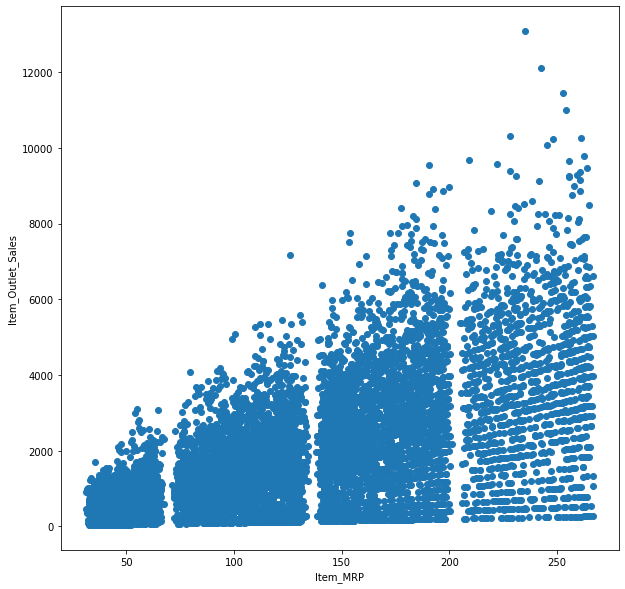

In [138]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=train["Item_MRP"],y=train["Item_Outlet_Sales"])
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show

Item Visibility vs. Sales

<function matplotlib.pyplot.show>

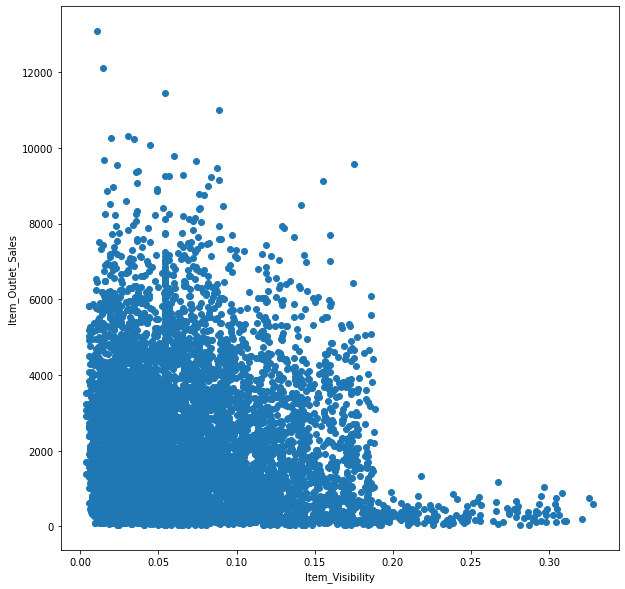

In [135]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x=train["Item_Visibility"],y=train["Item_Outlet_Sales"])
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.show

Item Type vs. Sales

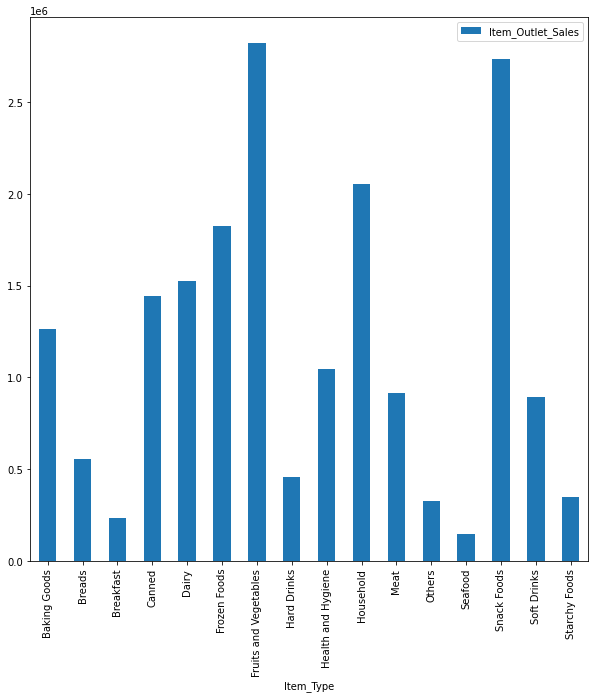

In [137]:
train[["Item_Type","Item_Outlet_Sales"]].groupby("Item_Type").sum().plot.bar(figsize = (10,10))

Outlet_Size vs. Sales


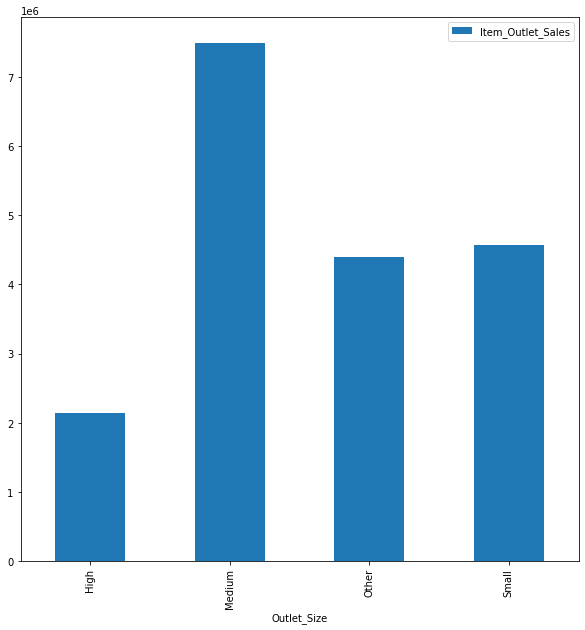

In [140]:
train[["Outlet_Size","Item_Outlet_Sales"]].groupby("Outlet_Size").sum().plot.bar(figsize = (10,10))

Item Type vs. Item MRP


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

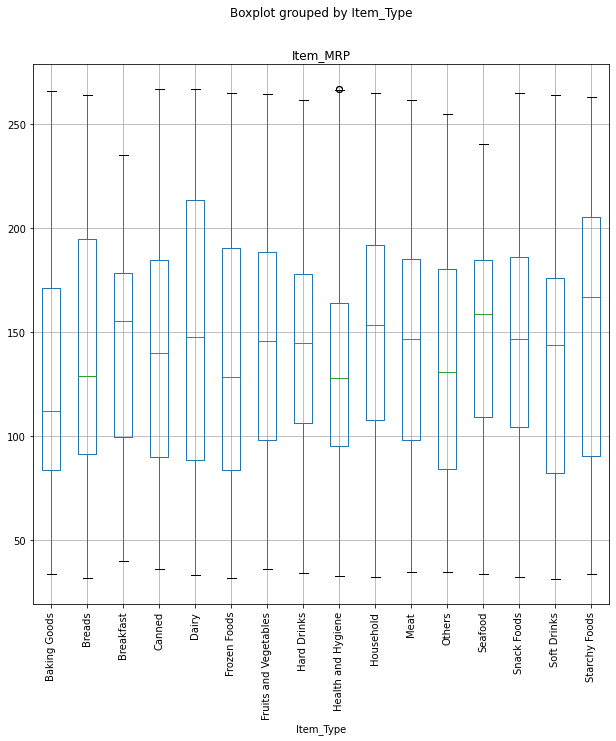

In [144]:
train[["Item_Type","Item_MRP"]].boxplot(column = "Item_MRP", by = "Item_Type",figsize = (10,10))
plt.xticks(rotation=90)

Outlet_Type vs. Sales


([<matplotlib.patches.Wedge at 0x7f106b7c3a20>,
 [Text(1.0978733908782392, 0.06836678726923501, 'Grocery Store'),
  Text(-0.7387910713883291, 0.8149771486593259, 'Supermarket Type1'),
  Text(0.09947584508552285, -1.0954928371488886, 'Supermarket Type2'),
  Text(0.9178987439430459, -0.6061863540758556, 'Supermarket Type3')],
 [Text(0.5988400313881305, 0.037290974874128184, '1.98%'),
  Text(-0.4029769480299977, 0.44453299017781406, '69.48%'),
  Text(0.054259551864830634, -0.5975415475357573, '9.96%'),
  Text(0.5006720421507523, -0.330647102223194, '18.58%')])

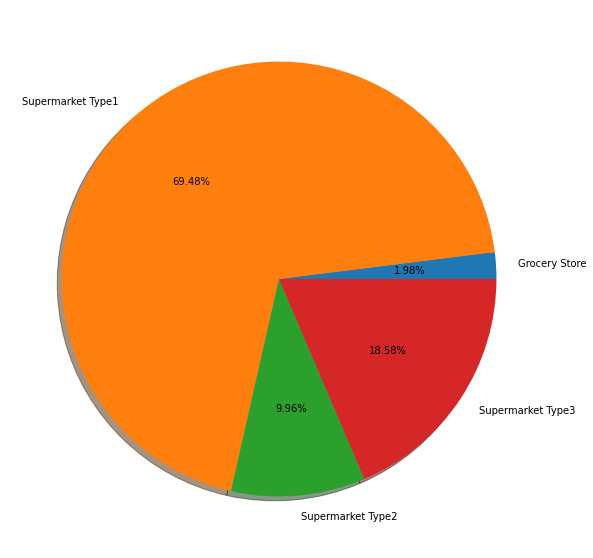

In [155]:
plt.figure(figsize=(10,10))
sizes = train.groupby("Outlet_Type").sum()["Item_Outlet_Sales"]
labels = sizes.index
plt.pie(x=sizes,labels=labels,shadow=True,autopct="%.2f%%")


# **5.Model Data**

### **5.1Feature Sacling & Selection**

Create new feature using "Outlet_Establishment_Year" build up a time range 

In [157]:
train["time"] = train["Outlet_Establishment_Year"].apply(lambda i : 2020-i)
test["time"] = test["Outlet_Establishment_Year"].apply(lambda i : 2020-i)


In [158]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,time
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


Create Dummy Variables 

In [162]:
dummy_train = pd.get_dummies(train[["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]])
dummy_test = pd.get_dummies(test[["Item_Fat_Content","Item_Type","Outlet_Size","Outlet_Location_Type","Outlet_Type"]])

In [163]:
train_df = pd.concat([train,dummy_train],axis=1)
test_df = pd.concat([test,dummy_test],axis=1)
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,time,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800,22,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.930,Low Fat,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Other,Tier 2,Supermarket Type1,549.2850,18,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,16,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0


Feature Scaling for "Item_Weight","Item_Outlet_Sales","time"
Because the model is linear regression so there is no need for feature scaling.











### **5.2 Model Build and Prediction**

In [205]:
train_x = train_df.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"],1)
train_x.head()

,Item_Weight,Item_Visibility,Item_MRP,time,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,19.20,0.054021,182.0950,22,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.93,0.054021,53.8614,33,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [209]:
train_y = train["Item_Outlet_Sales"]
train_y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### **5.2.1 Linear Regression**

In [210]:
from sklearn import linear_model
from sklearn import metrics

In [211]:
lr1 = linear_model.LinearRegression()
lr1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
prediction1 = lr1.predict(train_x)
metrics.mean_absolute_error(train_y,prediction1)


835.5278381937409

In [213]:
lr1.score(train_x,train_y)

0.5637364025853631

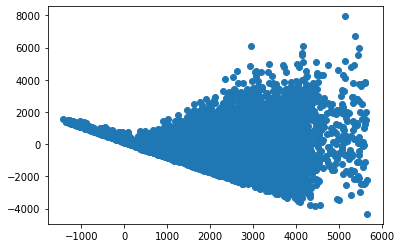

In [214]:
plt.scatter(prediction1,train_y-prediction1)

Deal with the heteroskedasticity problem

In [216]:
lr2 = linear_model.LinearRegression()
lr2.fit(train_x,np.log(train_y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
prediction2 = lr2.predict(train_x)
metrics.mean_absolute_error(np.exp(prediction2),train_y)

785.2649181657813

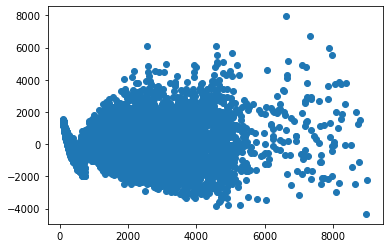

In [220]:
plt.scatter(np.exp(prediction2),train_y-prediction1)

Prediction

In [228]:
test_x = test_df.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier",\
                         "Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"],1)

In [241]:
lr_pred = lr2.predict(test_x)
df_predict = pd.DataFrame(np.exp(lr_pred))
df_predict.columns = ["predict sales"]
text_lr = pd.concat([test_df,df_predict],axis=1)
text_lr[["Item_Identifier","Outlet_Identifier","predict sales"]]

,Item_Identifier,Outlet_Identifier,predict sales
0,FDW58,OUT049,1431.301839
1,FDW14,OUT017,1142.503861
2,NCN55,OUT010,593.268678
3,FDQ58,OUT017,2120.147262
4,FDY38,OUT027,6378.451823
...,...,...,...
5676,FDB58,OUT046,1840.110465
5677,FDD47,OUT018,1869.694296
5678,NCO17,OUT045,1469.106492
5679,FDJ26,OUT017,3606.634755
